In [44]:
from scipy.cluster.hierarchy import weighted
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from sklearn.metrics import f1_score

In [45]:
train_set = pd.read_csv('train_data.csv')
test_set = pd.read_csv('test_data.csv')
train_set.drop(['zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid', 'dec', 'dec_o'], inplace=True, axis=1)
test_set.drop(['zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid', 'dec', 'dec_o'], inplace=True, axis=1)
X_train = train_set.drop(['match'], axis=1)
y_train = train_set['match']
X_test = test_set.drop(['match'], axis=1)
y_test = test_set['match']

In [46]:
#First attempt
rnd_clf = RandomForestClassifier(n_jobs=1, random_state=42)
scores = cross_val_score(rnd_clf, X_train, y_train, cv=5, scoring = 'f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.55217391 0.44221106 0.11764706 0.35842294 0.10309278]
0.31470954994332895
0.17786067538251263


In [47]:
#Hyperparameter tuning
param_grid = [{"n_estimators": [300, 500, 700], "max_leaf_nodes": [10, 15, 20, 25, 30]}]
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

0.104324953946727 {'max_leaf_nodes': 10, 'n_estimators': 300}
0.09984953542122325 {'max_leaf_nodes': 10, 'n_estimators': 500}
0.08889477323212262 {'max_leaf_nodes': 10, 'n_estimators': 700}
0.16280384999675485 {'max_leaf_nodes': 15, 'n_estimators': 300}
0.16088418841123905 {'max_leaf_nodes': 15, 'n_estimators': 500}
0.15232544580448448 {'max_leaf_nodes': 15, 'n_estimators': 700}
0.20437997875207053 {'max_leaf_nodes': 20, 'n_estimators': 300}
0.1980950227400983 {'max_leaf_nodes': 20, 'n_estimators': 500}
0.1875414496152033 {'max_leaf_nodes': 20, 'n_estimators': 700}
0.22130261213830543 {'max_leaf_nodes': 25, 'n_estimators': 300}
0.21932982183835814 {'max_leaf_nodes': 25, 'n_estimators': 500}
0.21002011635056855 {'max_leaf_nodes': 25, 'n_estimators': 700}
0.23418040323549585 {'max_leaf_nodes': 30, 'n_estimators': 300}
0.22744131970909248 {'max_leaf_nodes': 30, 'n_estimators': 500}
0.22451947133813518 {'max_leaf_nodes': 30, 'n_estimators': 700}


In [48]:
#Hyperparameter tuning p.2
param_grid = [{"n_estimators": [100, 300, 500, 1000], 'bootstrap': [True, False]}]
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

0.31470954994332895 {'bootstrap': True, 'n_estimators': 100}
0.29032120624721497 {'bootstrap': True, 'n_estimators': 300}
0.28520306403676393 {'bootstrap': True, 'n_estimators': 500}
0.28731206252956976 {'bootstrap': True, 'n_estimators': 1000}
0.29514432941573093 {'bootstrap': False, 'n_estimators': 100}
0.3042635850044894 {'bootstrap': False, 'n_estimators': 300}
0.29839544226655335 {'bootstrap': False, 'n_estimators': 500}
0.29683038901876324 {'bootstrap': False, 'n_estimators': 1000}


In [49]:
rnd_clf = grid_search.best_estimator_

In [50]:
grid_search.best_estimator_

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4472
           1       1.00      1.00      1.00       915

    accuracy                           1.00      5387
   macro avg       1.00      1.00      1.00      5387
weighted avg       1.00      1.00      1.00      5387



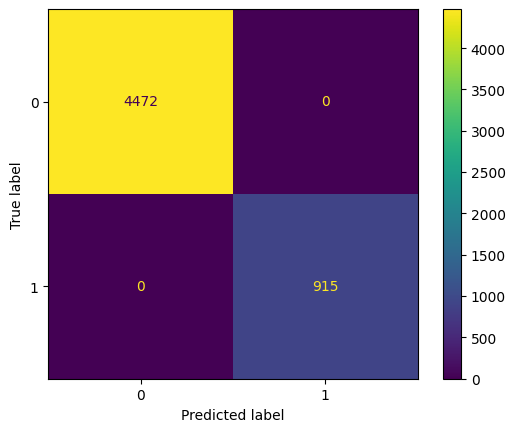

In [84]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_train)
print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_estimator(rnd_clf, X_train, y_train)

In [81]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=100)
cross_val_score(rnd_clf, X_train, y_train, cv=5, scoring='f1')

array([0.54010695, 0.42165242, 0.16113744, 0.29343629, 0.09278351])

In [96]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=100, class_weight='balanced')
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test.drop(['Unnamed: 0'], axis=1))
y_probs = rnd_clf.predict_proba(X_test.drop(['Unnamed: 0'], axis=1))[:, 1]
y_pred = (y_probs >= 0.3).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1105
           1       0.59      0.54      0.56       242

    accuracy                           0.85      1347
   macro avg       0.75      0.73      0.74      1347
weighted avg       0.85      0.85      0.85      1347



In [ ]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=100)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4472
           1       1.00      1.00      1.00       915

    accuracy                           1.00      5387
   macro avg       1.00      1.00      1.00      5387
weighted avg       1.00      1.00      1.00      5387



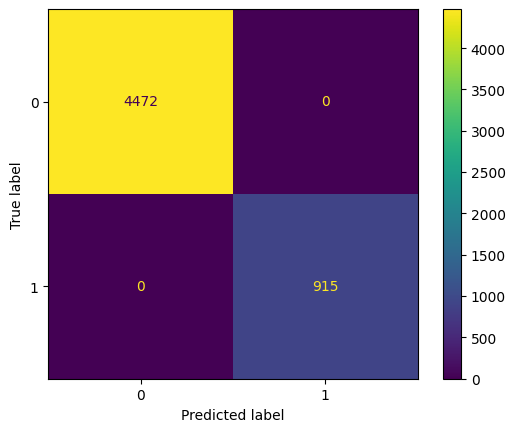

In [78]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=100)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_train)
print(classification_report(y_train, y_pred))
ConfusionMatrixDisplay.from_estimator(rnd_clf, X_train, y_train)

In [67]:
X_train

,gender,idg,condtn,wave,round,position,order,partner,pid,int_corr,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,1,1,10,7,4,1,11.0,0.14,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,10,7,3,2,12.0,0.54,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,10,7,5,4,14.0,0.61,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,10,7,7,5,15.0,0.21,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,10,7,6,6,16.0,0.25,...,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,1,44,2,21,22,6,19,10,518.0,0.47,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
5383,1,44,2,21,22,9,22,12,520.0,0.37,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
5384,1,44,2,21,22,8,21,13,521.0,0.27,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
5385,1,44,2,21,22,4,17,14,522.0,0.45,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [68]:
y_train

0       0
1       0
2       1
3       1
4       0
       ..
5382    0
5383    0
5384    0
5385    0
5386    0
Name: match, Length: 5387, dtype: int64

In [65]:
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [60]:
#Feture importances
importances = rnd_clf.feature_importances_
imp_df = pd.DataFrame({'Feature': train_set.columns.drop(['Unnamed: 0']), 'Coefficient': importances.flatten()})
imp_df.sort_values(ascending = False, by = 'Coefficient', inplace = True)
print(imp_df)

      Feature  Coefficient
26     like_o     0.040078
91       like     0.039446
85       attr     0.028956
20     attr_o     0.027215
88        fun     0.026165
..        ...          ...
171   shar2_3     0.001073
178   sinc5_3     0.001051
158    amb7_3     0.001038
179  intel5_3     0.001002
3        wave     0.000968

[182 rows x 2 columns]


In [ ]:
#Testing
rnd_clf = RandomForestClassifier(...)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
score = f1_score(y_test, y_pred)
print(score)
ConfusionMatrixDisplay.from_estimator(rnd_clf, X_test, y_test)